In [1]:
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# using MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [4]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [5]:
np.random.seed(42)
tf.random.set_seed(42)
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

In [6]:
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

In [7]:
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])

In [8]:
history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

Epoch 1/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3378 - rounded_accuracy: 0.8872 - val_loss: 0.3138 - val_rounded_accuracy: 0.9105
Epoch 2/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3061 - rounded_accuracy: 0.9145 - val_loss: 0.3045 - val_rounded_accuracy: 0.9186
Epoch 3/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2997 - rounded_accuracy: 0.9201 - val_loss: 0.2988 - val_rounded_accuracy: 0.9210
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2960 - rounded_accuracy: 0.9234 - val_loss: 0.2957 - val_rounded_accuracy: 0.9242
Epoch 5/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2934 - rounded_accuracy: 0.9257 - val_loss: 0.2936 - val_rounded_accuracy: 0.9266
Epoch 6/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2915 - rounded_accuracy: 0.9274 - val_loss: 0.2916 - val_rounded_accuracy: 0.9288
Epoch 7/20
1719/1719 [==================

#### This function processes a few test images through the autoencoder and displays the original images and their reconstructions:

In [11]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

1/1 [==============================] - 0s 11ms/step


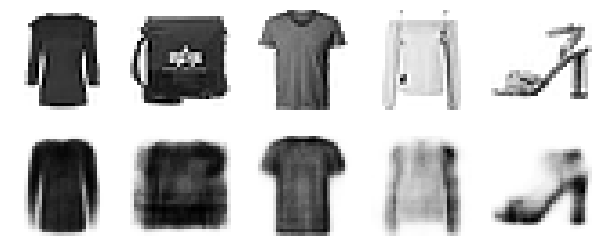

In [13]:
show_reconstructions(stacked_ae)